In [1]:
import pandas as pd
import json

articles = pd.read_csv("articles_with_cluster.tsv", sep = "\t")

In [2]:
multiple_maxima = []
clear_articles = []
count_ones = 0 
only_one_kw = 0

topics = [topic for topic in articles.columns if topic not in ["id", "title"]]
for article in articles.to_dict("records"):
    maximum = max([score for topic, score in article.items() if topic in topics])
    if maximum == 1:
        count_ones +=1
    if sum([score for topic, score in article.items() if topic in topics]) == 1:
        only_one_kw +=1
    if list(article.values()).count(maximum)>1:
        multiple_maxima.append(article)
    else:
        clear_articles.append(article)


final_articles = clear_articles + pd.read_csv("classified_multiple_maxima_topics.tsv", sep ="\t").to_dict("records")

In [3]:
with open("corpus.json", "r") as f:
    corpus = json.load(f)

vis_corpus = []

def get_topic(article):
    maximum = max([score for topic, score in article.items() if topic in topics])
    for topic, score in article.items():
        if score == maximum:
            return topic


for article in final_articles:
    tmp = {"id": article["id"]}
    tmp["topic"] = get_topic(article)
    for art in corpus:
        if article["id"] == art["id"]:
            tmp["date"] = art["date"]
            vis_corpus.append(tmp)


In [10]:
pd.DataFrame(overview)["topic"].unique()

array(['kampfhandlungen', 'humanitär', 'verhandlungen',
       'militaerische-unterstuetzung', 'wirtschaft'], dtype=object)

# Aufbereitung Daten für Übersicht

In [18]:
overview = [article.copy() for article in vis_corpus]

for article in overview:
    if "human" in article["topic"].lower():
        article["topic"] ="humanitär"


for article in overview:
    article["month"] = article["date"].split(".")[1]
    article["year"] = article["date"].split(".")[2]

by_month = {}
by_year = {}

for year in list(range(2015, 2023)):
    by_year[str(year)] = [0 for _ in range(5)]
    for month in ["0" + str(i) for i in range(1, 10)] + ["10", "11", "12"]:
        if (year == 2015 and month in ["01", "02"]) or (year == 2022 and month in ["08", "09", "10", "11", "12"]):
            continue
        by_month[f"{month}/{year}"] = [0 for _ in range(5)]


for i, sub_topic in enumerate(['kampfhandlungen', 'humanitär', 'verhandlungen','militaerische-unterstuetzung', 'wirtschaft']):
    for article in overview:
        if sub_topic in article["topic"].lower():
             by_month[f"{article['month']}/{article['year']}"][i]+= 1
 
for year in [str(y) for y in range(2015, 2023)]:
    for mon, val_list in by_month.items():
        if year in mon:
            by_year[year] = [sum(x) for x in zip(by_year[year], val_list)]


In [21]:
by_month

{'03/2015': [28, 1, 1, 2, 5],
 '04/2015': [20, 3, 6, 7, 0],
 '05/2015': [11, 0, 7, 3, 0],
 '06/2015': [8, 0, 3, 0, 0],
 '07/2015': [7, 1, 4, 1, 0],
 '08/2015': [4, 1, 1, 0, 0],
 '09/2015': [15, 1, 1, 2, 0],
 '10/2015': [2, 1, 0, 0, 1],
 '11/2015': [0, 1, 1, 1, 0],
 '12/2015': [1, 0, 2, 0, 0],
 '01/2016': [1, 2, 2, 0, 0],
 '02/2016': [0, 0, 0, 0, 0],
 '03/2016': [6, 0, 3, 0, 0],
 '04/2016': [2, 0, 0, 0, 0],
 '05/2016': [2, 2, 0, 1, 0],
 '06/2016': [2, 1, 1, 0, 0],
 '07/2016': [0, 0, 1, 0, 0],
 '08/2016': [12, 1, 0, 0, 0],
 '09/2016': [0, 0, 0, 0, 0],
 '10/2016': [6, 1, 5, 2, 0],
 '11/2016': [0, 2, 3, 0, 0],
 '12/2016': [5, 0, 1, 2, 0],
 '01/2017': [7, 0, 0, 0, 0],
 '02/2017': [7, 0, 0, 2, 0],
 '03/2017': [3, 9, 0, 0, 0],
 '04/2017': [0, 5, 0, 0, 0],
 '05/2017': [0, 3, 1, 0, 0],
 '06/2017': [0, 3, 0, 0, 0],
 '07/2017': [1, 2, 0, 0, 0],
 '08/2017': [0, 5, 0, 0, 0],
 '09/2017': [0, 3, 1, 0, 0],
 '10/2017': [0, 1, 0, 0, 0],
 '11/2017': [3, 8, 0, 1, 0],
 '12/2017': [12, 1, 1, 0, 1],
 '01/201

# Aufbereitung Daten für Humanitäre Krise

In [65]:
humanitaer = [article for article in vis_corpus if "human" in article["topic"]]

for article in humanitaer:
    article["month"] = article["date"].split(".")[1]
    article["year"] = article["date"].split(".")[2]

by_month = {}
by_year = {}

for year in list(range(2015, 2023)):
    by_year[str(year)] = [0 for _ in range(5)]
    for month in ["0" + str(i) for i in range(1, 10)] + ["10", "11", "12"]:
        by_month[f"{month}/{year}"] = [0 for _ in range(5)]


for i, sub_topic in enumerate(["hunger", "klima", "flucht", "krankheit", "hilfe"]):
    for article in humanitaer:
        if sub_topic in article["topic"].lower():
             by_month[f"{article['month']}/{article['year']}"][i]+= 1
 
for year in [str(y) for y in range(2015, 2023)]:
    for mon, val_list in by_month.items():
        if year in mon:
            by_year[year] = [sum(x) for x in zip(by_year[year], val_list)]


## Visualisierung humanitäre Krise pro Jahr

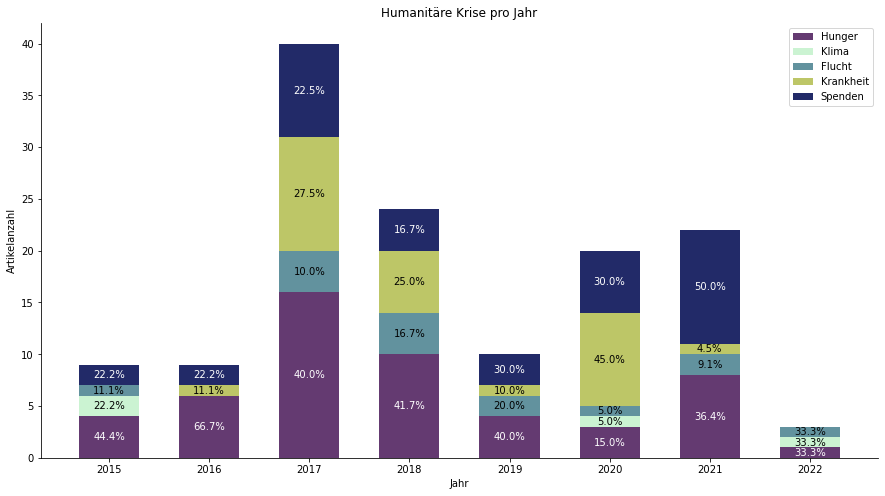

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = {'2015': [4, 2, 1, 0, 2],
        '2016': [6, 0, 0, 1, 2],
        '2017': [16, 0, 4, 11, 9],
        '2018': [10, 0, 4, 6, 4],
        '2019': [4, 0, 2, 1, 3],
        '2020': [3, 1, 1, 9, 6],
        '2021': [8, 0, 2, 1, 11],
        '2022': [1, 1, 1, 0, 0]}

weight_counts = {}
for i, topic in enumerate(["Hunger", "Klima", "Flucht", "Krankheit", "Spenden"]):
    weight_counts[topic] = np.array([v[i] for _, v in data.items()])


days = list(data.keys())
width = 0.6


fig, ax = plt.subplots()

bottom = np.zeros(len(days))

# pastell und blau
# colors = ["#F2BAC9", "#222A68", "#79B791"]
# mit
# colors = ["#F2BAC9", "#222A68", "#62929E"]
# colors = ["#BDC667", "#222A68", "#62929E"]
#

colors = ["#643A71", "#CBF3D2", "#62929E", "#BDC667", "#222A68"]


for i, pack in enumerate(weight_counts.items()):
    boolean = pack[0]
    weight_count = pack[1]
    p = ax.bar(days, weight_count, width, label=boolean,
               bottom=bottom, color=colors[i])
    bottom += weight_count


ax.set_title('Humanitäre Krise pro Jahr')

ax.legend(loc="upper right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


def get_hundret_percent(i):
    result = 0
    for _, vals in weight_counts.items():
        result += vals[i]
    return result


def get_position(weight_counts, i, reason):
    result = 0
    for r, vals in weight_counts.items():
        if r == reason:
            break
        else:
            result += vals[i]
    result += weight_counts[reason][i]/2
    return result


for i, day in enumerate(days):
    hundret = get_hundret_percent(i)
    num = sum([x[i] for x in weight_counts.values()])
    plt.text(i, num + 0.5, "$n$ = " + str(num),
             va='center', ha='center', rotation=0, fontsize=10
             )

    for reason in weight_counts.keys():
        percentage = weight_counts[reason][i]/hundret * 100
        perc_string = str(np.round(percentage, 1)) + '%'
        pos = get_position(weight_counts, i, reason)
        if perc_string != "0.0%":
            if reason != "Hunger" and reason != "Spenden":
                plt.text(i, pos, perc_string,
                         va='center', ha='center', rotation=0, fontsize=10
                         )
            else:
                plt.text(i, pos, perc_string,
                         va='center', ha='center', rotation=0, fontsize=10, color="white"
                         )


fig.set_figheight(8)

fig.set_figwidth(15)
plt.xlabel("Jahr")
plt.ylabel("Artikelanzahl")
plt.savefig('humanitare-krise-pro-jahr.png', dpi=300)
